In [75]:
import pandas as pd
import psycopg2
import sqlalchemy
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns
import copy

%matplotlib inline

In [83]:
df_cannabinoid_results = pd.read_pickle('./pkls/cleaned_cannabinoid_test_results.pkl')

In [77]:
df_cannabinoid_results.describe()

,CBC,CBCA,CBD,CBD Per Package,CBD Per Serving,CBDA,CBDV,CBDVA,CBG,CBGA,...,THCA Per Package,THCA Per Serving,THCV,THCVA,Total CBD,Total CBD Per Serving,Total THC,Total THC Per Package,Total THC Per Serving,THC/CBD
count,13206.000000,13206.000000,13430.000000,1342.000000,992.000000,13429.000000,13205.000000,13205.000000,13429.000000,13206.000000,...,1.00,1.00,13206.000000,13206.000000,13423.000000,1.00,13425.000000,722.000000,62.000000,85.000000
mean,0.448810,0.133975,4.040197,136.240626,44.168034,0.593237,0.012941,0.004150,0.703768,0.455505,...,236.66,15.78,0.056770,0.066946,4.561203,26.25,34.037268,485.713449,90.723387,1.586300
std,0.930033,0.414148,16.019682,696.394958,186.323703,3.681959,0.108442,0.041334,1.356202,1.113798,...,NaN,NaN,0.565705,0.218346,16.727474,NaN,30.971257,311.091000,181.476060,6.991861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,236.66,15.78,0.000000,0.000000,0.000000,26.25,0.000000,0.000000,0.000000,0.032129
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,236.66,15.78,0.000000,0.000000,0.000000,26.25,8.331367,200.987500,4.385000,0.096693
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013040,0.097940,...,236.66,15.78,0.000000,0.000000,0.000000,26.25,20.790097,622.135000,9.595000,0.501505
75%,0.781000,0.000000,0.000000,51.620000,9.300000,0.000000,0.000000,0.000000,1.458000,0.648362,...,236.66,15.78,0.000000,0.000000,0.158439,26.25,68.336120,721.902500,54.252500,1.066000
max,18.110000,13.339000,99.970720,18039.210000,2921.480000,74.975070,4.622370,1.326000,91.405820,68.837200,...,236.66,15.78,50.085000,5.155360,99.970720,26.25,96.039400,2806.200000,820.750000,64.751000


In [4]:
for index, row in df_cannabinoid_results.iterrows():
    if index < 10:
        #print(row)
        this_row = copy.deepcopy(row)
        this_row.replace(np.nan, 0, inplace=True)
        #print(this_row.keys())
        print('THC:', this_row['Total THC'] - this_row['Delta-9-THC'] - this_row['THCA']*0.877-this_row['THCV'] - this_row["THCVA"])
        print('CBD:', this_row['Total CBD'] - this_row['CBD'] - this_row['CBDA']*0.877)
        print('THC Rat:', this_row['THCA']/this_row['Total THC'])
        print(1/0.877)

THC: -0.07786
CBD: 0.0
THC Rat: 0.819874164472
1.1402508551881414
THC: -0.00106
CBD: 0.0
THC Rat: 1.14102564103
1.1402508551881414
THC: -0.12596
CBD: 6.93889390391e-18
THC Rat: 1.0658838549
1.1402508551881414
THC: -0.08082
CBD: 0.0
THC Rat: 1.00948762889
1.1402508551881414
THC: -0.09024
CBD: 6.93889390391e-18
THC Rat: 1.00029795293
1.1402508551881414
THC: -0.09226
CBD: 0.0
THC Rat: 1.05804315712
1.1402508551881414
THC: 1.7763568394e-15
CBD: 0.0
THC Rat: 1.11991668391
1.1402508551881414
THC: -3.5527136788e-15
CBD: 0.0
THC Rat: 1.11627813847
1.1402508551881414
THC: 0.0
CBD: 0.0
THC Rat: 1.11860055228
1.1402508551881414
THC: 0.0
CBD: 0.0
THC Rat: 1.11265662031
1.1402508551881414


<h3>Let's decide which data will be useful in a clustering model</h3>
<h5>First, I think it's a good idea to get rid of all the 'Per Package' and 'Per Serving' columns, because these only give information based on an arbitrry way someone chose to split up the data</h5>


In [5]:
for column in df_cannabinoid_results:
    print(column)

CBC
CBCA
CBD
CBD Per Package
CBD Per Serving
CBDA
CBDV
CBDVA
CBG
CBGA
CBN
Delta-8-THC
Delta-9-THC
Delta-9-THC Per Package
Delta-9-THC Per Serving
THC
THC Per Package
THC Per Serving
THCA
THCA Per Package
THCA Per Serving
THCV
THCVA
Total CBD
Total CBD Per Serving
Total THC
Total THC Per Package
Total THC Per Serving
THC/CBD


In [84]:
df_cannabinoid_results = df_cannabinoid_results.drop(columns=['CBD Per Package', 'CBD Per Serving', 'Delta-9-THC Per Package', 'Delta-9-THC Per Serving', 'THC Per Package', 'THC Per Serving', 'THCA Per Package', 'THCA Per Serving', 'Total CBD Per Serving', 'Total THC Per Package', 'Total THC Per Serving'])

In [79]:
df_cannabinoid_results.head(10)

,CBC,CBCA,CBD,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,Delta-8-THC,Delta-9-THC,THC,THCA,THCV,THCVA,Total CBD,Total THC,THC/CBD
0,0.05203,0.14793,0.0,0.04166,0.0,0.0,0.12430,0.34842,0.17462,0.0,4.45027,NaN,12.98593,0.0,0.07786,0.036536,15.838931,NaN
1,NaN,NaN,0.0,0.00000,NaN,NaN,0.00000,NaN,0.00000,NaN,NaN,0.0,1.78000,NaN,NaN,0.000000,1.560000,NaN
2,0.03536,0.19160,0.0,0.06608,0.0,0.0,0.06765,0.78929,0.00000,0.0,1.44990,NaN,23.69562,0.0,0.12596,0.057952,22.230959,NaN
3,0.03095,0.17408,0.0,0.05445,0.0,0.0,0.04420,0.25094,0.00000,0.0,1.93657,NaN,17.04704,0.0,0.08082,0.047753,16.886824,NaN
4,0.03728,0.12468,0.0,0.04386,0.0,0.0,0.06691,0.33667,0.00000,0.0,1.85913,NaN,15.15157,0.0,0.09024,0.038465,15.147057,NaN
5,0.04242,0.35812,0.0,0.05627,0.0,0.0,0.10411,0.41703,0.00000,0.0,1.27196,NaN,18.66658,0.0,0.09226,0.049349,17.642551,NaN
6,NaN,NaN,0.0,0.00000,NaN,NaN,0.00000,NaN,0.00000,NaN,0.25000,NaN,15.70000,NaN,NaN,0.000000,14.018900,NaN
7,NaN,NaN,0.0,0.00000,NaN,NaN,0.00000,NaN,0.00000,NaN,0.42000,NaN,22.30000,NaN,NaN,0.000000,19.977100,NaN
8,NaN,NaN,0.0,0.00000,NaN,NaN,0.00000,NaN,0.00000,NaN,0.46000,NaN,27.10000,NaN,NaN,0.000000,24.226700,NaN
9,NaN,NaN,0.0,0.00000,NaN,NaN,0.00000,NaN,0.00000,NaN,1.76000,NaN,80.92000,NaN,NaN,0.000000,72.726840,NaN


In [80]:
df_cannabinoid_results.describe()

,CBC,CBCA,CBD,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,Delta-8-THC,Delta-9-THC,THC,THCA,THCV,THCVA,Total CBD,Total THC,THC/CBD
count,13206.000000,13206.000000,13430.000000,13429.000000,13205.000000,13205.000000,13429.000000,13206.000000,13428.000000,13204.000000,13326.000000,112.000000,13429.000000,13206.000000,13206.000000,13423.000000,13425.000000,85.000000
mean,0.448810,0.133975,4.040197,0.593237,0.012941,0.004150,0.703768,0.455505,0.459759,0.121357,22.087730,12.046920,13.707633,0.056770,0.066946,4.561203,34.037268,1.586300
std,0.930033,0.414148,16.019682,3.681959,0.108442,0.041334,1.356202,1.113798,1.236062,2.115187,32.762935,24.659951,19.283983,0.565705,0.218346,16.727474,30.971257,6.991861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032129
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.389055,0.597500,0.000000,0.000000,0.000000,0.000000,8.331367,0.096693
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013040,0.097940,0.000000,0.000000,1.362050,1.775000,5.173540,0.000000,0.000000,0.000000,20.790097,0.501505
75%,0.781000,0.000000,0.000000,0.000000,0.000000,0.000000,1.458000,0.648362,0.487915,0.000000,56.694500,3.940000,21.167000,0.000000,0.000000,0.158439,68.336120,1.066000
max,18.110000,13.339000,99.970720,74.975070,4.622370,1.326000,91.405820,68.837200,32.431000,75.030370,96.039400,85.200000,99.984110,50.085000,5.155360,99.970720,96.039400,64.751000


In [85]:
df_cannabinoid_results['Delta-9-THC'].update(df_cannabinoid_results['THC'])
df_cannabinoid_results.describe()

,CBC,CBCA,CBD,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,Delta-8-THC,Delta-9-THC,THC,THCA,THCV,THCVA,Total CBD,Total THC,THC/CBD
count,13206.000000,13206.000000,13430.000000,13429.000000,13205.000000,13205.000000,13429.000000,13206.000000,13428.000000,13204.000000,13431.000000,112.000000,13429.000000,13206.000000,13206.000000,13423.000000,13425.000000,85.000000
mean,0.448810,0.133975,4.040197,0.593237,0.012941,0.004150,0.703768,0.455505,0.459759,0.121357,22.002417,12.046920,13.707633,0.056770,0.066946,4.561203,34.037268,1.586300
std,0.930033,0.414148,16.019682,3.681959,0.108442,0.041334,1.356202,1.113798,1.236062,2.115187,32.714889,24.659951,19.283983,0.565705,0.218346,16.727474,30.971257,6.991861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032129
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390860,0.597500,0.000000,0.000000,0.000000,0.000000,8.331367,0.096693
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013040,0.097940,0.000000,0.000000,1.367910,1.775000,5.173540,0.000000,0.000000,0.000000,20.790097,0.501505
75%,0.781000,0.000000,0.000000,0.000000,0.000000,0.000000,1.458000,0.648362,0.487915,0.000000,56.393740,3.940000,21.167000,0.000000,0.000000,0.158439,68.336120,1.066000
max,18.110000,13.339000,99.970720,74.975070,4.622370,1.326000,91.405820,68.837200,32.431000,75.030370,96.039400,85.200000,99.984110,50.085000,5.155360,99.970720,96.039400,64.751000


In [86]:
df_cannabinoid_results = df_cannabinoid_results.drop(columns=['THC'])
df_cannabinoid_results2 = df_cannabinoid_results.drop(columns=['THC/CBD'])

In [87]:
df_cannabinoid_results2 = df_cannabinoid_results2.dropna(how='any')
df_cannabinoid_results2.describe()

,CBC,CBCA,CBD,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,Delta-8-THC,Delta-9-THC,THCA,THCV,THCVA,Total CBD,Total THC
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,0.448889,0.134036,4.078878,0.600740,0.012945,0.004151,0.710385,0.455704,0.463837,0.121394,22.181381,13.463136,0.056795,0.066977,4.605757,33.998559
std,0.930146,0.414232,16.088742,3.710443,0.108463,0.041342,1.363172,1.114012,1.241461,2.115506,32.826552,18.835005,0.565832,0.218391,16.800356,30.933972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388115,0.000000,0.000000,0.000000,0.000000,8.488954
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015000,0.098595,0.000000,0.000000,1.362790,5.098285,0.000000,0.000000,0.000000,20.808183
75%,0.781000,0.000000,0.000000,0.000000,0.000000,0.000000,1.473602,0.648425,0.507050,0.000000,57.097500,21.093343,0.000000,0.000000,0.156178,68.261857
max,18.110000,13.339000,99.970720,74.975070,4.622370,1.326000,91.405820,68.837200,32.431000,75.030370,96.039400,99.984110,50.085000,5.155360,99.970720,96.039400


In [61]:
df_cannabinoid_results.head(10)

,CBC,CBCA,CBD,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,Delta-8-THC,Delta-9-THC,THCA,THCV,THCVA,Total CBD,Total THC
0,0.05203,0.14793,0.00000,0.04166,0.00000,0.0,0.12430,0.34842,0.17462,0.00000,4.45027,12.98593,0.0,0.07786,0.036536,15.838931
2,0.03536,0.19160,0.00000,0.06608,0.00000,0.0,0.06765,0.78929,0.00000,0.00000,1.44990,23.69562,0.0,0.12596,0.057952,22.230959
3,0.03095,0.17408,0.00000,0.05445,0.00000,0.0,0.04420,0.25094,0.00000,0.00000,1.93657,17.04704,0.0,0.08082,0.047753,16.886824
4,0.03728,0.12468,0.00000,0.04386,0.00000,0.0,0.06691,0.33667,0.00000,0.00000,1.85913,15.15157,0.0,0.09024,0.038465,15.147057
5,0.04242,0.35812,0.00000,0.05627,0.00000,0.0,0.10411,0.41703,0.00000,0.00000,1.27196,18.66658,0.0,0.09226,0.049349,17.642551
12,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.42800,0.00000,0.00000,1.59800,17.14200,0.0,0.00000,0.000000,16.631534
13,0.00000,0.00000,1.96473,0.00000,0.01476,0.0,0.01711,0.00000,0.00000,0.00000,0.53442,0.00000,0.0,0.00000,1.964730,0.534420
14,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.44000,0.00000,0.00000,1.59400,18.01900,0.0,0.00000,0.000000,17.396663
16,0.01902,0.00000,0.00000,0.00000,0.00000,0.0,0.02581,0.00000,0.01189,0.00000,0.69279,0.00000,0.0,0.00000,0.001810,0.692790
18,0.00000,0.33796,0.00000,0.08755,0.00000,0.0,0.09420,1.32462,0.00000,0.06716,0.59058,28.28939,0.0,0.18917,0.076781,25.400375


<h5>We will look the PCA of the two result sets separately because they should theoretically be a difference</h5>

In [88]:
df_cannabinoid_results2.head(10)

,CBC,CBCA,CBD,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,Delta-8-THC,Delta-9-THC,THCA,THCV,THCVA,Total CBD,Total THC
0,0.05203,0.14793,0.00000,0.04166,0.00000,0.0,0.12430,0.34842,0.17462,0.00000,4.45027,12.98593,0.0,0.07786,0.036536,15.838931
2,0.03536,0.19160,0.00000,0.06608,0.00000,0.0,0.06765,0.78929,0.00000,0.00000,1.44990,23.69562,0.0,0.12596,0.057952,22.230959
3,0.03095,0.17408,0.00000,0.05445,0.00000,0.0,0.04420,0.25094,0.00000,0.00000,1.93657,17.04704,0.0,0.08082,0.047753,16.886824
4,0.03728,0.12468,0.00000,0.04386,0.00000,0.0,0.06691,0.33667,0.00000,0.00000,1.85913,15.15157,0.0,0.09024,0.038465,15.147057
5,0.04242,0.35812,0.00000,0.05627,0.00000,0.0,0.10411,0.41703,0.00000,0.00000,1.27196,18.66658,0.0,0.09226,0.049349,17.642551
12,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.42800,0.00000,0.00000,1.59800,17.14200,0.0,0.00000,0.000000,16.631534
13,0.00000,0.00000,1.96473,0.00000,0.01476,0.0,0.01711,0.00000,0.00000,0.00000,0.53442,0.00000,0.0,0.00000,1.964730,0.534420
14,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.44000,0.00000,0.00000,1.59400,18.01900,0.0,0.00000,0.000000,17.396663
16,0.01902,0.00000,0.00000,0.00000,0.00000,0.0,0.02581,0.00000,0.01189,0.00000,0.69279,0.00000,0.0,0.00000,0.001810,0.692790
18,0.00000,0.33796,0.00000,0.08755,0.00000,0.0,0.09420,1.32462,0.00000,0.06716,0.59058,28.28939,0.0,0.18917,0.076781,25.400375


<h5>#This step is only a temporary solution to understand where tings are breaking</h5>

In [89]:
df_cannabinoid_results.replace(np.nan, 0, inplace=True)
df_cannabinoid_results.describe()

,CBC,CBCA,CBD,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,Delta-8-THC,Delta-9-THC,THCA,THCV,THCVA,Total CBD,Total THC,THC/CBD
count,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000,13431.000000
mean,0.441292,0.131731,4.039896,0.593149,0.012723,0.004080,0.703664,0.447874,0.459656,0.119306,22.002417,13.705592,0.055819,0.065825,4.558486,34.022063,0.010039
std,0.924006,0.411024,16.019124,3.681692,0.107539,0.040988,1.356128,1.105975,1.235943,2.097293,32.714889,19.283273,0.560993,0.216679,16.722862,30.972690,0.567090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390860,0.000000,0.000000,0.000000,0.000000,8.313500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013010,0.047320,0.000000,0.000000,1.367910,5.169000,0.000000,0.000000,0.000000,20.783866,0.000000
75%,0.754740,0.000000,0.000000,0.000000,0.000000,0.000000,1.457500,0.638260,0.487505,0.000000,56.393740,21.165650,0.000000,0.000000,0.157743,68.331732,0.000000
max,18.110000,13.339000,99.970720,74.975070,4.622370,1.326000,91.405820,68.837200,32.431000,75.030370,96.039400,99.984110,50.085000,5.155360,99.970720,96.039400,64.751000


In [90]:
df_cannabinoid_results2.describe()

,CBC,CBCA,CBD,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,Delta-8-THC,Delta-9-THC,THCA,THCV,THCVA,Total CBD,Total THC
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,0.448889,0.134036,4.078878,0.600740,0.012945,0.004151,0.710385,0.455704,0.463837,0.121394,22.181381,13.463136,0.056795,0.066977,4.605757,33.998559
std,0.930146,0.414232,16.088742,3.710443,0.108463,0.041342,1.363172,1.114012,1.241461,2.115506,32.826552,18.835005,0.565832,0.218391,16.800356,30.933972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388115,0.000000,0.000000,0.000000,0.000000,8.488954
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015000,0.098595,0.000000,0.000000,1.362790,5.098285,0.000000,0.000000,0.000000,20.808183
75%,0.781000,0.000000,0.000000,0.000000,0.000000,0.000000,1.473602,0.648425,0.507050,0.000000,57.097500,21.093343,0.000000,0.000000,0.156178,68.261857
max,18.110000,13.339000,99.970720,74.975070,4.622370,1.326000,91.405820,68.837200,32.431000,75.030370,96.039400,99.984110,50.085000,5.155360,99.970720,96.039400


<p>Between these two kinds of results, the means and standard deviations are basically the same, except the df where the rows containing NaNs were deleted instead of NaNs replaced with zeros has higher values, as expected</p>

In [69]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA 

<h5>Standardize cannabinoid data -</h5> <p>Shifted and scaled to have mean zero and variance 1 (normal dist)</p>

In [91]:
scalar = StandardScaler()
cannabinoid_results_scaled = scalar.fit_transform(df_cannabinoid_results)
scalar2 = StandardScaler()
cannabinoid_results2_scaled = scalar.fit_transform(df_cannabinoid_results2)

In [93]:
print(cannabinoid_results_scaled[:3])

[[-0.42129152  0.03941349 -0.25220146 -0.14979779 -0.11831918 -0.09954382
  -0.42723479 -0.08992803 -0.2306308  -0.05688778 -0.5365386  -0.0373219
  -0.09950308  0.05554583 -0.27041537 -0.58709169 -0.01770353]
 [-0.47760275 -0.32050589 -0.25220146 -0.16111366 -0.11831918 -0.09954382
  -0.51889619 -0.40497403 -0.37192094 -0.05688778 -0.67257561 -0.61846532
  -0.09950308 -0.30380057 -0.27260024 -1.04812565 -0.01770353]
 [-0.43933319  0.14566428 -0.25220146 -0.14316473 -0.11831918 -0.09954382
  -0.46900967  0.30871248 -0.37192094 -0.05688778 -0.62825469  0.51808634
  -0.09950308  0.27754123 -0.26913466 -0.38070774 -0.01770353]]


In [94]:
print(cannabinoid_results2_scaled[:3])

[[-0.42667895  0.03354284 -0.25353334 -0.15068309 -0.11935128 -0.10041239
  -0.42995852 -0.09630754 -0.23297359 -0.05738501 -0.54016586 -0.02533706
  -0.10037865  0.04983576 -0.27198197 -0.58706707]
 [-0.44460155  0.13897077 -0.25353334 -0.14410141 -0.11935128 -0.10041239
  -0.47151758  0.29945724 -0.37363572 -0.05738501 -0.63157002  0.54329011
  -0.10037865  0.27009178 -0.27070717 -0.38042467]
 [-0.44934293  0.09667406 -0.25353334 -0.14723593 -0.11935128 -0.10041239
  -0.48872076 -0.1838144  -0.37363572 -0.05738501 -0.61674396  0.19028613
  -0.10037865  0.06338998 -0.27131429 -0.55319062]]


In [98]:
pca = PCA()
pca.fit(X=cannabinoid_results_scaled)

pca2 = PCA()
pca2.fit(X=cannabinoid_results2_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<h4>I think there is a problem with the missing values in the results matrix</h4>  <h5>First going to replace missing values with zero and try again.  Still need to figure out the best way to deal with missing data</5>

In [99]:
pca_cannabinoid_results = pca.transform(cannabinoid_results_scaled)
pca2_cannabinoid_results2 = pca2.transform(cannabinoid_results2_scaled)

<h5>We generated new principal component features, and now we are going to have a look</h5>

In [100]:
pca_cannabinoid_results[:5]

array([[ -9.18632437e-01,  -1.61810343e-01,  -4.79396267e-01,
          2.08515235e-01,   2.89984635e-02,  -1.69748783e-02,
          1.54368081e-03,  -1.15490049e-01,   1.19079433e-01,
          2.27623274e-01,  -7.20575337e-02,   1.44583935e-01,
          5.44459515e-02,   3.03196551e-02,   5.09350013e-02,
          1.76921208e-04,  -1.10657792e-04],
       [ -9.67104117e-01,   2.36136011e-01,  -1.25060693e+00,
          6.01571987e-01,  -1.23325201e-02,  -3.72230118e-02,
          3.87089514e-02,  -1.47785144e-01,   1.60570190e-01,
          1.95999807e-01,  -4.33994675e-03,   3.21790975e-01,
          1.22698370e-01,   5.18511122e-02,   4.49344202e-02,
          3.00542588e-04,  -1.66139901e-04],
       [ -1.22622755e+00,  -4.23656681e-01,  -1.69462555e-02,
         -1.89707953e-01,   2.14036117e-02,  -6.58091616e-03,
          5.29914684e-03,  -2.76799689e-02,   5.77534627e-02,
          6.42443674e-02,  -2.47865807e-02,   5.31291529e-03,
          6.35450838e-02,   1.24175402e-03

In [101]:
pca2_cannabinoid_results2[:5]

array([[ -9.21580983e-01,  -1.56783840e-01,  -4.96652665e-01,
          2.02102074e-01,   2.55534648e-02,   1.57400535e-03,
         -1.12718216e-01,   1.27540261e-01,   2.19127876e-01,
         -7.55849853e-02,   1.25534140e-01,   7.21487835e-02,
          4.24553558e-02,   4.77250843e-02,  -1.38792585e-04,
         -2.45687522e-06],
       [ -1.23784289e+00,  -4.22706062e-01,  -2.87969181e-02,
         -1.89581509e-01,   1.86414940e-02,   4.20147410e-03,
         -2.66535542e-02,   6.06368532e-02,   5.98887441e-02,
         -2.66538209e-02,  -2.19241321e-02,   5.75807407e-02,
          3.15488514e-04,   1.25615478e-01,  -1.26154996e-04,
         -1.64031433e-06],
       [ -1.07735584e+00,  -1.88323059e-01,  -4.50613667e-01,
          1.38590029e-01,   3.07937299e-03,   8.52543618e-03,
         -1.25253520e-01,   9.71430861e-02,   2.10869445e-01,
         -1.84454897e-01,  -7.89098974e-02,   9.53339951e-02,
          4.28404144e-02,   9.00614287e-02,  -1.45790494e-04,
         -2.2586

<h5>Now, we look at cumulative explained variance so we can decide a threshold and make a cut on the new principle component features</h5>

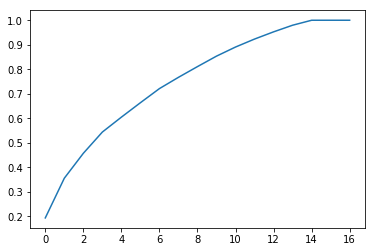

In [102]:
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(len(cum_exp_var)), cum_exp_var)

In [103]:
print(cum_exp_var)

[ 0.19413223  0.35599502  0.45759379  0.54419513  0.60494425  0.66377297
  0.72133474  0.76729373  0.81102848  0.85369113  0.89078343  0.92329451
  0.95266835  0.9796947   0.99996003  0.99999815  1.        ]


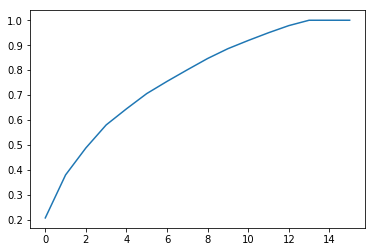

In [104]:
cum_exp_var2 = np.cumsum(pca2.explained_variance_ratio_)

plt.plot(range(len(cum_exp_var2)), cum_exp_var2)

In [105]:
print(cum_exp_var2)

[ 0.20751217  0.37993544  0.48806924  0.5802973   0.64483675  0.70601216
  0.75491875  0.80136512  0.84662953  0.8860176   0.91883812  0.94986852
  0.9784691   0.99997348  1.          1.        ]


<h5>Get these priciple components into dataframes, but first, let's refit taking only the 10 of each</h5>

In [106]:
pca = PCA(n_components=10)
pca2 = PCA(n_components=10)

pca_cannabinoid_results = pca.fit_transform(cannabinoid_results_scaled)
pca2_cannabinoid_results2 = pca2.fit_transform(cannabinoid_results2_scaled)

In [107]:
print(pca_cannabinoid_results.shape)
pca2_cannabinoid_results2.shape

(13431, 10)


(13200, 10)

In [108]:
df_pca1 = pd.DataFrame(pca_cannabinoid_results)
df_pca2 = pd.DataFrame(pca2_cannabinoid_results2)

# Give our columns names

df_pca1.columns = ['PC{}'.format(i+1) for i in range(df_pca1.shape[1])]
df_pca2.columns = ['PC{}'.format(i+1) for i in range(df_pca2.shape[1])]
                   
# Update indices
  
df_pca1.index = df_cannabinoid_results.index
df_pca2.index = df_cannabinoid_results2.index

print(df_pca1.head())
print(df_pca2.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.918632 -0.161810 -0.479396  0.208515  0.028998 -0.016975  0.001544   
1 -0.967104  0.236136 -1.250607  0.601572 -0.012333 -0.037223  0.038709   
2 -1.226228 -0.423657 -0.016946 -0.189708  0.021404 -0.006581  0.005299   
3 -1.072739 -0.192936 -0.435423  0.144437  0.005786 -0.018182  0.007891   
4 -1.066826 -0.166180 -0.499807  0.129450  0.005211 -0.018925  0.017608   

        PC8       PC9      PC10  
0 -0.115490  0.119079  0.227623  
1 -0.147785  0.160570  0.196000  
2 -0.027680  0.057753  0.064244  
3 -0.126618  0.089357  0.210625  
4 -0.170641  0.071832  0.157425  
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.921581 -0.156784 -0.496653  0.202102  0.025553  0.001574 -0.112718   
2 -1.237843 -0.422706 -0.028797 -0.189582  0.018641  0.004201 -0.026654   
3 -1.077356 -0.188323 -0.450614  0.138590  0.003079  0.008525 -0.125254   
4 -1.070228 -0.160834 -0.515674  0.123044  0.

In [109]:
df_pca1.to_pickle('./pkls/df_canna_pca1.pkl')
df_pca2.to_pickle('./pkls/df_canna_pca2.pkl')

<h5>Now lets look at some clustering using the basic df with all the NaN rows removed, pca1, and pca2</h5>
<p>That would be df_cannabinoid_results2, df_pca1, df_pca2</p>

In [111]:
# Scikit-Learn's make_pipeline function and KMeans algorithm
from sklearn.pipeline import make_pipeline

from sklearn.cluster import KMeans, AgglomerativeClustering
#from sklearn.mixture import GMM


<h3>First we will initialize the model pipeline for KMeans, then we fit the model, then save the cluster assignments to the dataframe</h3>

<h5>First fit model on the basic df</h5>

In [120]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [121]:
# Fit K-Means pipeline
k_means.fit(df_cannabinoid_results2)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [122]:
# Adding cluster assignment to dataframe
df_cannabinoid_results2['cluster'] = k_means.predict(df_cannabinoid_results2)

df_cannabinoid_results2.head(20)

,CBC,CBCA,CBD,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,Delta-8-THC,Delta-9-THC,THCA,THCV,THCVA,Total CBD,Total THC,cluster
0,0.05203,0.14793,0.00000,0.04166,0.00000,0.0,0.12430,0.34842,0.17462,0.00000,4.45027,12.98593,0.0,0.07786,0.036536,15.838931,0
2,0.03536,0.19160,0.00000,0.06608,0.00000,0.0,0.06765,0.78929,0.00000,0.00000,1.44990,23.69562,0.0,0.12596,0.057952,22.230959,0
3,0.03095,0.17408,0.00000,0.05445,0.00000,0.0,0.04420,0.25094,0.00000,0.00000,1.93657,17.04704,0.0,0.08082,0.047753,16.886824,0
4,0.03728,0.12468,0.00000,0.04386,0.00000,0.0,0.06691,0.33667,0.00000,0.00000,1.85913,15.15157,0.0,0.09024,0.038465,15.147057,0
5,0.04242,0.35812,0.00000,0.05627,0.00000,0.0,0.10411,0.41703,0.00000,0.00000,1.27196,18.66658,0.0,0.09226,0.049349,17.642551,0
12,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.42800,0.00000,0.00000,1.59800,17.14200,0.0,0.00000,0.000000,16.631534,0
13,0.00000,0.00000,1.96473,0.00000,0.01476,0.0,0.01711,0.00000,0.00000,0.00000,0.53442,0.00000,0.0,0.00000,1.964730,0.534420,0
14,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.44000,0.00000,0.00000,1.59400,18.01900,0.0,0.00000,0.000000,17.396663,0
16,0.01902,0.00000,0.00000,0.00000,0.00000,0.0,0.02581,0.00000,0.01189,0.00000,0.69279,0.00000,0.0,0.00000,0.001810,0.692790,0
18,0.00000,0.33796,0.00000,0.08755,0.00000,0.0,0.09420,1.32462,0.00000,0.06716,0.59058,28.28939,0.0,0.18917,0.076781,25.400375,0


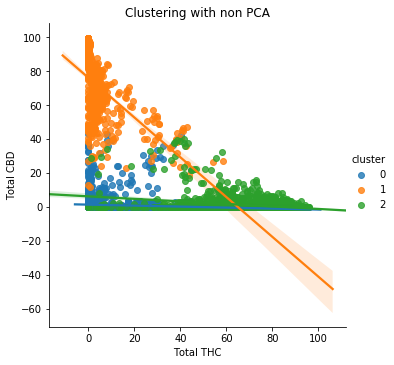

In [167]:
# Scatterplot, colored by cluster
sns.lmplot(x='Total THC', y='Total CBD', hue='cluster', data=df_cannabinoid_results2)
plt.title("Clustering with non PCA")
pp.savefig()

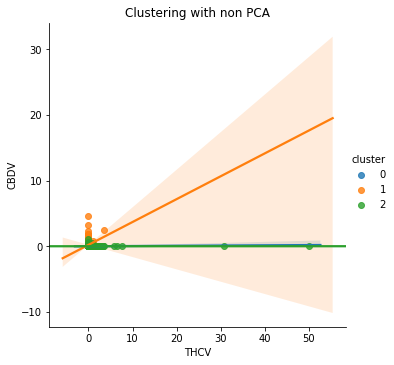

In [171]:
sns.lmplot(x='THCV', y='CBDV', hue='cluster', data=df_cannabinoid_results2)
plt.title("Clustering with non PCA")
pp.savefig()

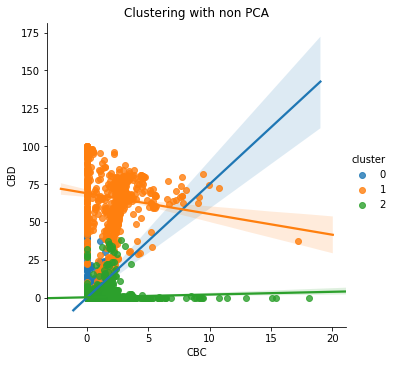

In [176]:
sns.lmplot(x='CBC', y='CBD', hue='cluster', data=df_cannabinoid_results2)
plt.title("Clustering with non PCA")
pp.savefig()

<h5>Next fit model on the pca1</h5>

In [126]:
# K-Means model pipeline
k_means_pca1 = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [127]:
# Fit K-Means pipeline
k_means_pca1.fit(df_pca1)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [128]:
# Adding cluster assignment to dataframe
df_pca1['cluster'] = k_means_pca1.predict(df_pca1)

df_pca1.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster
0,-0.918632,-0.161810,-0.479396,0.208515,0.028998,-0.016975,0.001544,-0.115490,0.119079,0.227623,2
1,-0.967104,0.236136,-1.250607,0.601572,-0.012333,-0.037223,0.038709,-0.147785,0.160570,0.196000,2
2,-1.226228,-0.423657,-0.016946,-0.189708,0.021404,-0.006581,0.005299,-0.027680,0.057753,0.064244,2
3,-1.072739,-0.192936,-0.435423,0.144437,0.005786,-0.018182,0.007891,-0.126618,0.089357,0.210625,2
4,-1.066826,-0.166180,-0.499807,0.129450,0.005211,-0.018925,0.017608,-0.170641,0.071832,0.157425,2
5,-1.160219,-0.265838,-0.096488,0.135943,0.033165,-0.009378,0.000049,0.045524,0.126523,0.371463,2
6,-1.000415,-0.046916,-0.918669,0.278283,-0.028513,-0.030601,-0.001363,-0.086688,0.147110,0.055458,2
7,-1.014788,-0.181810,-0.760783,0.124678,-0.036415,-0.027456,-0.020537,-0.057649,0.140489,-0.011701,2
8,-1.027561,-0.278789,-0.646779,0.013493,-0.041786,-0.025178,-0.034197,-0.036645,0.136065,-0.059689,2
9,-1.147155,-1.377626,0.639861,-1.238542,-0.105833,0.000459,-0.190256,0.200032,0.082471,-0.606460,2


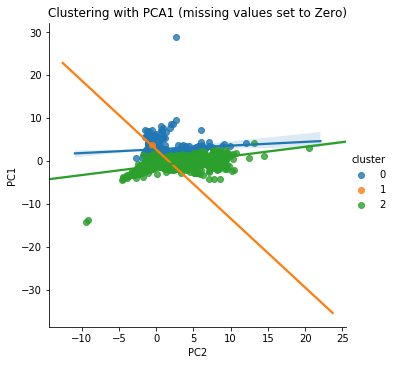

In [181]:
# Scatterplot, colored by cluster
sns.lmplot(x='PC2', y='PC1', hue='cluster', data=df_pca1)
plt.title("Clustering with PCA1 (missing values set to Zero)")
pp.savefig()

In [133]:
df_pca1.shape

(13431, 11)

<h5>Lets join the df_pca1 with df_cannabinoid_results so we can look at the clustering based on analyte relationships</h5>

In [135]:
df_1 = df_cannabinoid_results.join(df_pca1)

In [136]:
df_1.shape

(13431, 28)

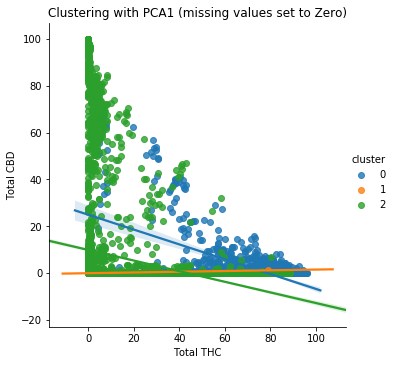

In [168]:
sns.lmplot(x='Total THC', y='Total CBD', hue='cluster', data=df_1)
plt.title("Clustering with PCA1 (missing values set to Zero)")
pp.savefig()

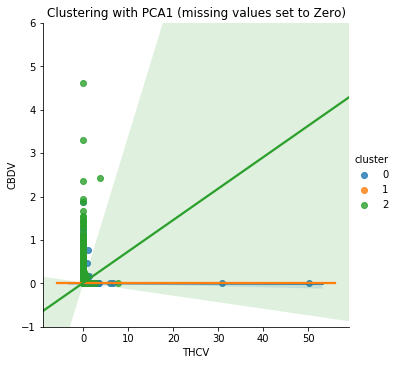

In [213]:
lm = sns.lmplot(x='THCV', y='CBDV', hue='cluster', data=df_1)
plt.title("Clustering with PCA1 (missing values set to Zero)")
axes = lm.axes
axes[0,0].set_ylim(-1,6)
#axes[0,1].set_xlim(-10,20)
#pp.savefig()
plt.savefig("./CBDV-THCV-PCA1")
#pp.savefig()

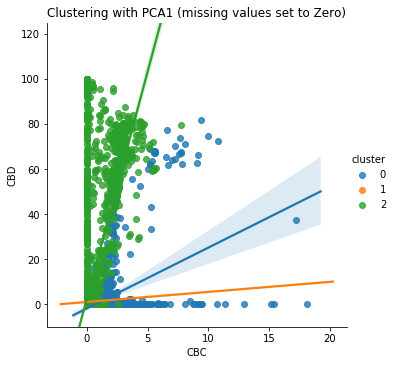

In [210]:
lm = sns.lmplot(x='CBC', y='CBD', hue='cluster', data=df_1)
plt.title("Clustering with PCA1 (missing values set to Zero)")
axes = lm.axes
axes[0,0].set_ylim(-10,125)
#axes[0,1].set_xlim(-10,20)
#pp.savefig()
plt.savefig("./CBC-CBD-PCA1")

<h5>Create new 'results2' dataframe with previous cluster assignment removed (might not use this)</h5>

In [140]:
df_cannabinoid_results2_cluster_removed = df_cannabinoid_results2.drop('cluster', axis=1)

<h5>Next fit model on the pca2</h5>

In [141]:
# K-Means model pipeline
k_means_pca2 = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [142]:
# Fit K-Means pipeline
k_means_pca2.fit(df_pca2)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [143]:
# Adding cluster assignment to dataframe
df_pca2['cluster2'] = k_means_pca2.predict(df_pca2)

df_pca2.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster2
0,-0.921581,-0.156784,-0.496653,0.202102,0.025553,0.001574,-0.112718,0.127540,0.219128,-0.075585,1
2,-1.237843,-0.422706,-0.028797,-0.189582,0.018641,0.004201,-0.026654,0.060637,0.059889,-0.026654,1
3,-1.077356,-0.188323,-0.450614,0.138590,0.003079,0.008525,-0.125254,0.097143,0.210869,-0.184455,1
4,-1.070228,-0.160834,-0.515674,0.123044,0.001962,0.017687,-0.168450,0.079209,0.153208,-0.094150,1
5,-1.167784,-0.263109,-0.114465,0.134412,0.030322,-0.000716,0.046624,0.135417,0.367296,-0.326049,1
12,-1.048835,-0.146783,-0.746925,0.123729,-0.032455,-0.007271,0.092323,0.153485,-0.078770,0.091726,1
13,-0.917496,0.453463,-1.266950,0.537362,-0.002920,0.042113,-0.156399,0.222956,0.173650,-0.031411,1
14,-1.054365,-0.166353,-0.721716,0.100885,-0.033076,-0.009626,0.100730,0.152734,-0.089426,0.093317,1
16,-0.912773,0.278543,-1.304106,0.619296,-0.017089,0.040368,-0.149159,0.167416,0.194381,-0.008819,1
18,-1.461903,-0.643290,0.519939,-0.420712,0.087983,0.014200,0.093255,0.042752,0.074668,-0.009917,1


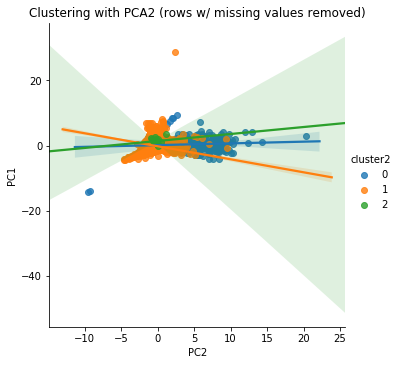

In [182]:
# Scatterplot, colored by cluster
sns.lmplot(x='PC2', y='PC1', hue='cluster2', data=df_pca2)
plt.title("Clustering with PCA2 (rows w/ missing values removed)")
pp.savefig()

In [145]:
df_2 = df_cannabinoid_results2.join(df_pca2)
df_2.head()

,CBC,CBCA,CBD,CBDA,CBDV,CBDVA,CBG,CBGA,CBN,Delta-8-THC,...,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster2
0,0.05203,0.14793,0.0,0.04166,0.0,0.0,0.12430,0.34842,0.17462,0.0,...,-0.156784,-0.496653,0.202102,0.025553,0.001574,-0.112718,0.127540,0.219128,-0.075585,1
2,0.03536,0.19160,0.0,0.06608,0.0,0.0,0.06765,0.78929,0.00000,0.0,...,-0.422706,-0.028797,-0.189582,0.018641,0.004201,-0.026654,0.060637,0.059889,-0.026654,1
3,0.03095,0.17408,0.0,0.05445,0.0,0.0,0.04420,0.25094,0.00000,0.0,...,-0.188323,-0.450614,0.138590,0.003079,0.008525,-0.125254,0.097143,0.210869,-0.184455,1
4,0.03728,0.12468,0.0,0.04386,0.0,0.0,0.06691,0.33667,0.00000,0.0,...,-0.160834,-0.515674,0.123044,0.001962,0.017687,-0.168450,0.079209,0.153208,-0.094150,1
5,0.04242,0.35812,0.0,0.05627,0.0,0.0,0.10411,0.41703,0.00000,0.0,...,-0.263109,-0.114465,0.134412,0.030322,-0.000716,0.046624,0.135417,0.367296,-0.326049,1


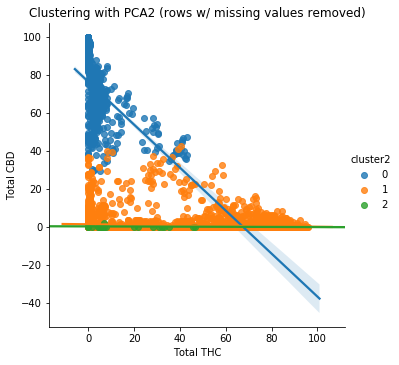

In [169]:
sns.lmplot(x='Total THC', y='Total CBD', hue='cluster2', data=df_2)
plt.title("Clustering with PCA2 (rows w/ missing values removed)")
pp.savefig()

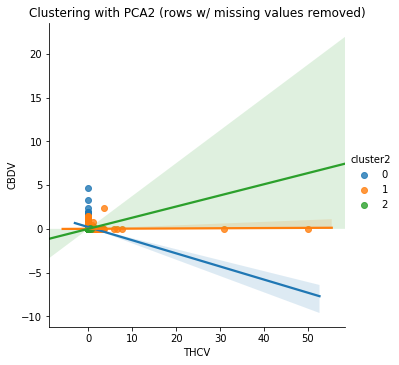

In [175]:
sns.lmplot(x='THCV', y='CBDV', hue='cluster2', data=df_2)
plt.title("Clustering with PCA2 (rows w/ missing values removed)")
pp.savefig()

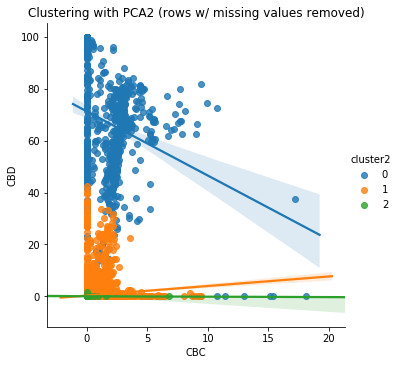

In [179]:
sns.lmplot(x='CBC', y='CBD', hue='cluster2', data=df_2)
plt.title("Clustering with PCA2 (rows w/ missing values removed)")
pp.savefig()

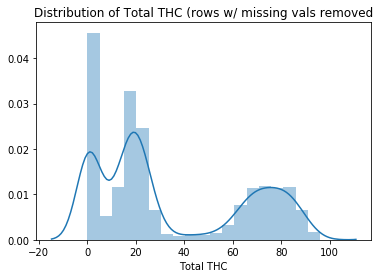

In [184]:
sns.distplot(df_2['Total THC'])
plt.title("Distribution of Total THC (rows w/ missing vals removed")
pp.savefig()

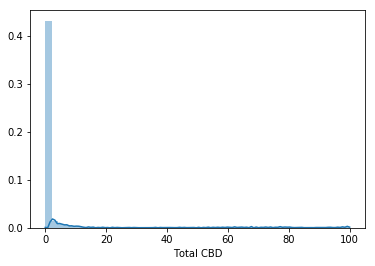

In [156]:
sns.distplot(df_2['Total CBD'])

<h5>Should add some total THC and Total CBD slices to give hue by to compare clusters</h5>

In [153]:
df_2['THC Slice'] = np.where(df_2['Total THC'] < 40, 0, 1)

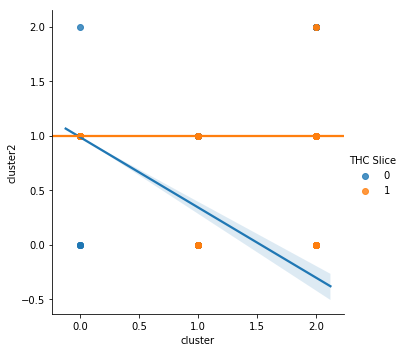

In [155]:
sns.lmplot(x='cluster', y='cluster2', hue='THC Slice', data=df_2)

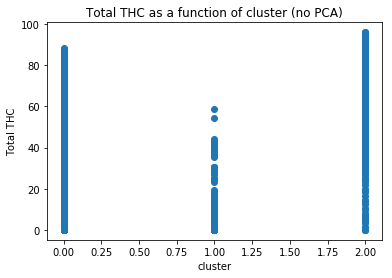

In [186]:
plt.scatter(df_2['cluster'], df_2['Total THC'])
plt.xlabel('cluster')
plt.ylabel('Total THC')
plt.title('Total THC as a function of cluster (no PCA)')
pp.savefig()

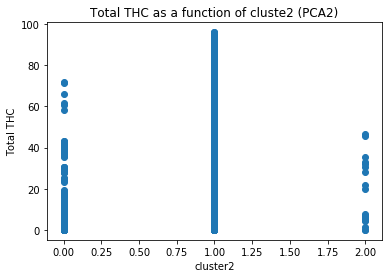

In [187]:
plt.scatter(df_2['cluster2'], df_2['Total THC'])
plt.xlabel('cluster2')
plt.ylabel('Total THC')
plt.title('Total THC as a function of cluste2 (PCA2)')
pp.savefig()

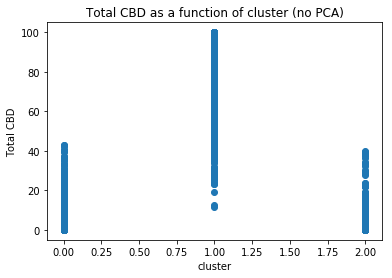

In [188]:
plt.scatter(df_2['cluster'], df_2['Total CBD'])
plt.xlabel('cluster')
plt.ylabel('Total CBD')
plt.title('Total CBD as a function of cluster (no PCA)')
pp.savefig()

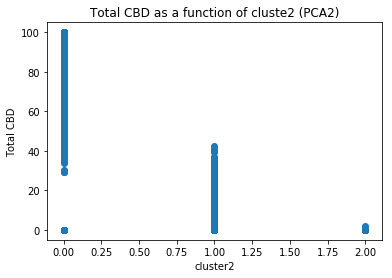

In [189]:
plt.scatter(df_2['cluster2'], df_2['Total CBD'])
plt.xlabel('cluster2')
plt.ylabel('Total CBD')
plt.title('Total CBD as a function of cluste2 (PCA2)')
pp.savefig()

In [162]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('clustering_cannabinoids.pdf')

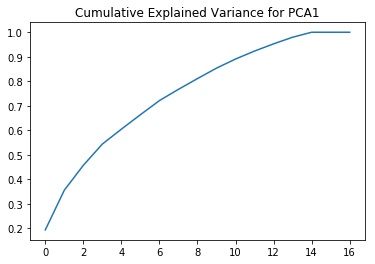

In [164]:
plt.plot(range(len(cum_exp_var)), cum_exp_var)
plt.title("Cumulative Explained Variance for PCA1")
pp.savefig()

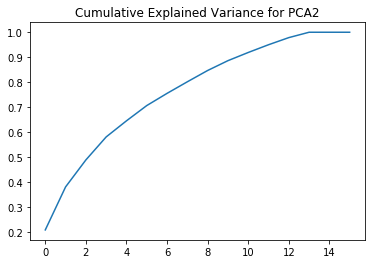

In [165]:
plt.plot(range(len(cum_exp_var2)), cum_exp_var2)
plt.title("Cumulative Explained Variance for PCA2")
pp.savefig()

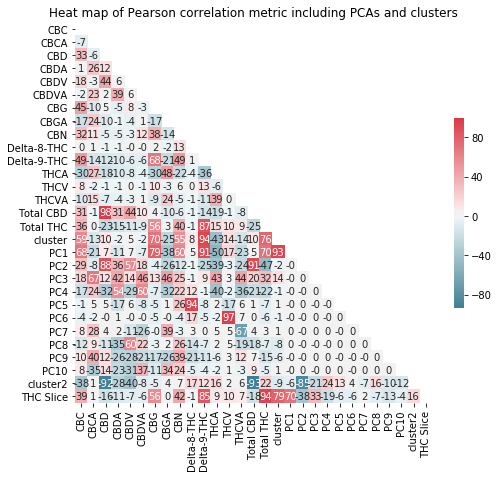

In [193]:
correlations = df_2.corr()
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,7))
plt.title('Heat map of Pearson correlation metric including PCAs and clusters')

cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr_heat = sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cmap=cmap, cbar_kws={"shrink": .5})
#corr_heat = sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar=False)
pp.savefig()

In [204]:
pp.close()

In [208]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('test.pdf')

In [214]:
from sklearn.metrics import adjusted_rand_score

In [215]:
adjusted_rand_score(df_2.cluster, df_2.cluster2)

0.220581062531714